<a href="https://colab.research.google.com/github/salmaelgd/Data_Analysis/blob/main/ACM_color_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#chargement des données
import pandas
D = pandas.read_excel("/content/drive/MyDrive/Colored_Systems_Faculty.xlsx",sheet_name="Sheet1")

print(D)

    No.      Couleur  Système   Faculté
0     1         Noir  Windows  Sciences
1     2         Noir    Linux       DEG
2     3      Argenté  Windows  Sciences
3     4      Argenté      Mac       DEG
4     5      Argenté    Linux  Sciences
5     6      Argenté    Linux  Sciences
6     7      Argenté    Linux  Sciences
7     8    Bleu ciel      Mac       DEG
8     9    Bleu ciel    Linux  Sciences
9    10  Vert menthe      Mac  Sciences
10   11  Vert menthe      Mac       DEG
11   12  Vert menthe      Mac       DEG


In [ ]:
#affichage des caractéristiques
print(D.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   No.      12 non-null     int64 
 1   Couleur  12 non-null     object
 2   Système  12 non-null     object
 3   Faculté  12 non-null     object
dtypes: int64(1), object(3)
memory usage: 512.0+ bytes
None


In [ ]:
#récupération des variables actives
DActives = D[['Couleur','Système','Faculté']]
print(DActives)

        Couleur  Système   Faculté
0          Noir  Windows  Sciences
1          Noir    Linux       DEG
2       Argenté  Windows  Sciences
3       Argenté      Mac       DEG
4       Argenté    Linux  Sciences
5       Argenté    Linux  Sciences
6       Argenté    Linux  Sciences
7     Bleu ciel      Mac       DEG
8     Bleu ciel    Linux  Sciences
9   Vert menthe      Mac  Sciences
10  Vert menthe      Mac       DEG
11  Vert menthe      Mac       DEG


In [ ]:
# Récupération des infos - nombre de variables
p = DActives.shape[1]
print(p)

# Nombre d'observations
n = DActives.shape[0]
print(n)

# Codage en 0/1 – les noms de modalités sont explicites
# Pas nécessaire de préfixer les indicatrices par les noms de variables
X = pandas.get_dummies(DActives, prefix='', prefix_sep='', dtype=int)
print(X)

#nombre total de modalités
M = X.shape[1]
print(M)

3
12
    Argenté  Bleu ciel  Noir  Vert menthe  Linux  Mac  Windows  DEG  Sciences
0         0          0     1            0      0    0        1    0         1
1         0          0     1            0      1    0        0    1         0
2         1          0     0            0      0    0        1    0         1
3         1          0     0            0      0    1        0    1         0
4         1          0     0            0      1    0        0    0         1
5         1          0     0            0      1    0        0    0         1
6         1          0     0            0      1    0        0    0         1
7         0          1     0            0      0    1        0    1         0
8         0          1     0            0      1    0        0    0         1
9         0          0     0            1      0    1        0    0         1
10        0          0     0            1      0    1        0    1         0
11        0          0     0            1      0    1      

In [ ]:
!pip install fanalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
#analyse avec fanalysis
from fanalysis.mca import MCA

In [ ]:
#instanciation
acm = MCA(row_labels=DActives.index,var_labels=DActives.columns)
acm.fit(DActives.values)

#propriétés
print(dir(acm))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_binarization', '_check_feature_names', '_check_n_features', '_compute_stats', '_compute_svd', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'c_', 'col_contrib_', 'col_coord_', 'col_cos2_', 'col_labels', 'col_labels_', 'col_labels_short_', 'col_labels_short_temp_', 'col_labels_temp_', 'col_topandas', 'eig_', 'fit', 'fit_transform', 'get_params', 'mapping', 'mapping_col', 'mapping_row', 'model_', 'n_', 'n_categories_', 'n_components', 'n_components_', 'n_vars_', 'plot_col_contrib', 'plot_c

In [ ]:
#nombre max de facteurs
Hmax = M-p

#numpy
import numpy

#valeurs propres
print(pandas.DataFrame(numpy.transpose(acm.eig_),columns=['Val.P','%','Cumul %'],index=range(1,Hmax+1)))

      Val.P          %     Cumul %
1  0.724277  36.213862   36.213862
2  0.433335  21.666771   57.880633
3  0.354985  17.749246   75.629879
4  0.264144  13.207191   88.837070
5  0.191155   9.557759   98.394828
6  0.032103   1.605172  100.000000


In [ ]:
print(p)

3


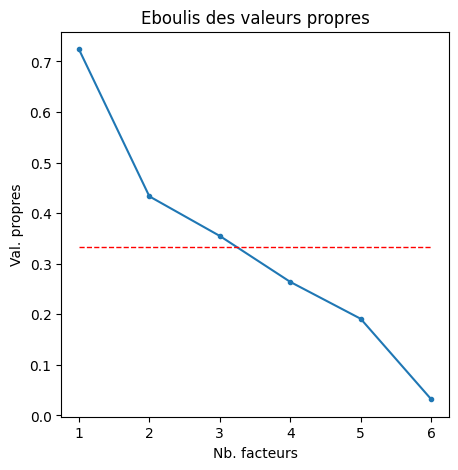

In [ ]:
#librairie graphique
import matplotlib.pyplot as plt
#éboulis des v.p.
fix,ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,Hmax+1),acm.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#seuil - Règle de Kaiser
ax.plot([1,Hmax],[1/p,1/p],"r--",linewidth=1)
plt.show()

# Benzecri

In [ ]:
#récupérer les valeurs propres supérieur à (1/p)
lambada = acm.eig_[0][acm.eig_[0]>1/p]
print(lambada)

[0.72427724 0.43333543 0.35498491]


In [ ]:
#appliquer la correction
lambada_prim = ((p/(p-1))*(lambada-1/p))**2
print(lambada_prim)

[0.34388356 0.02250094 0.00105478]


In [ ]:
#faire la somme
S_prim = numpy.sum(lambada_prim)
print(S_prim)

0.3674392820258274


In [ ]:
#et produire les pourcentages
percent_prim = lambada_prim/S_prim*100
#affichage
print(pandas.DataFrame(numpy.transpose(numpy.array([lambada_prim,percent_prim,numpy.cumsum(percent_prim)])),columns=['Val.P','%','Cumul %'],index=range(1,4)))

      Val.P          %     Cumul %
1  0.343884  93.589221   93.589221
2  0.022501   6.123717   99.712938
3  0.001055   0.287062  100.000000


# Greenacre

In [ ]:
#somme corrigée de Greenacre (S’’)
S2nd = p/(p-1)*(numpy.sum(acm.eig_[0]**2)-(M-p)/(p**2))
print(S2nd)

0.4185714285714298


In [ ]:
#pourcentage corrigé Greenacre
percent_2nd = lambada_prim/S2nd
#affichage
print(pandas.DataFrame(numpy.transpose(numpy.array([lambada_prim,percent_2nd,numpy
 .cumsum(percent_2nd)])),columns=['Val.P','%','Cumul %'],index=range(1,4)))

      Val.P         %   Cumul %
1  0.343884  0.821565  0.821565
2  0.022501  0.053757  0.875321
3  0.001055  0.002520  0.877841


# Analyse des modalités

In [ ]:
#affichage des coordonnées
print(pandas.DataFrame(acm.col_coord_[:,:3],index=X.columns,columns=['Coord.F1','Coord.F2','Coord.F3']))

             Coord.F1  Coord.F2  Coord.F3
Argenté      0.632657  0.438661 -0.640862
Bleu ciel   -0.299768  0.970095  1.563317
Noir         0.645519 -1.613486  1.110726
Vert menthe -1.284930 -0.302175 -0.714591
Linux        0.672905  0.649516  0.299820
Mac         -1.114168 -0.021031 -0.197358
Windows      1.103158 -1.571212 -0.256154
DEG         -0.916622 -0.162455  0.352198
Sciences     0.654730  0.116039 -0.251570


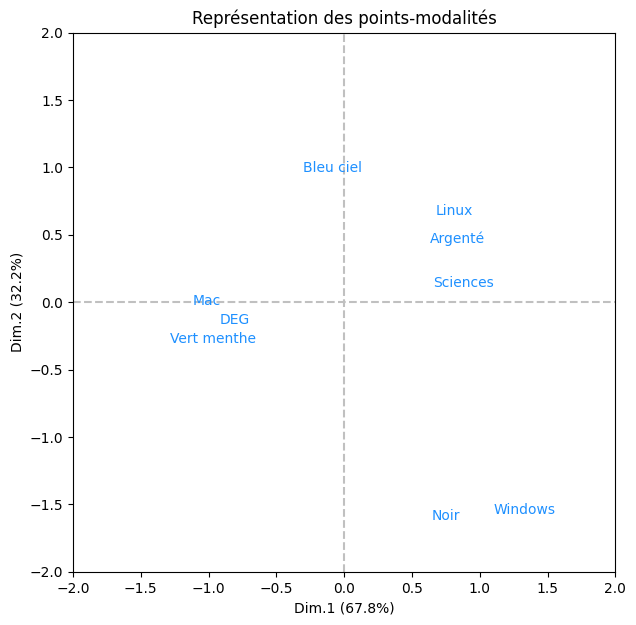

In [ ]:
#représentation dans le plan
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (67.8%)")
ax.set_ylabel("Dim.2 (32.2%)")
plt.title("Représentation des points-modalités")

for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')

plt.show()

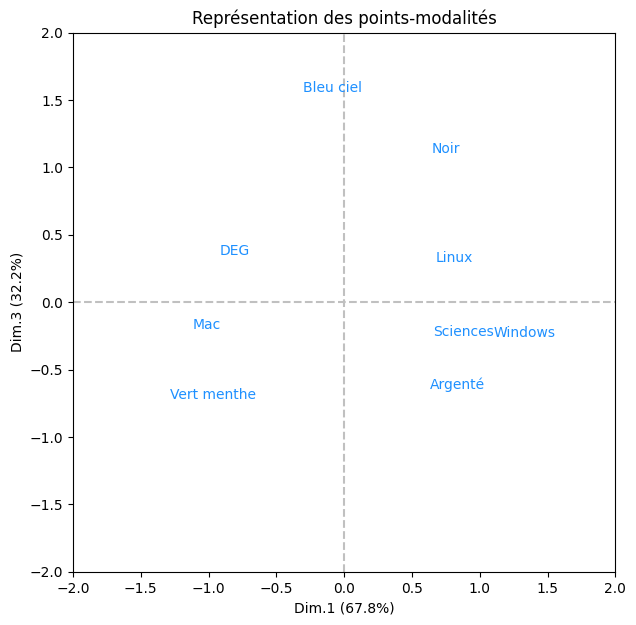

In [ ]:
#représentation dans le plan
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (67.8%)")
ax.set_ylabel("Dim.3 (32.2%)")
plt.title("Représentation des points-modalités")

for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,2],X.columns[i],color='dodgerblue')

plt.show()

# Contributions

In [ ]:
#affichage des contributions
print(pandas.DataFrame(acm.col_contrib_[:,:3],index=X.columns,columns=['Contrib.F1','Contrib.F2','Coord.F3']))

             Contrib.F1  Contrib.F2   Coord.F3
Argenté        7.675380    6.167392  16.068927
Bleu ciel      0.689277   12.065121  38.248254
Noir           3.196252   33.375945  19.307727
Vert menthe   18.996459    1.755943  11.987382
Linux          8.683009   13.521424   3.517047
Mac           23.804780    0.014176   1.523940
Windows        9.334649   31.649925   1.026881
DEG           16.111780    0.845877   4.853241
Sciences      11.508414    0.604198   3.466600


In [ ]:
#affichage des COS2
print(pandas.DataFrame(acm.col_cos2_[:,:3],index=X.columns,columns=['Cos2.F1','Cos2.F2','Cos2.F3']))

              Cos2.F1   Cos2.F2   Cos2.F3
Argenté      0.285897  0.137445  0.293360
Bleu ciel    0.017972  0.188217  0.488792
Noir         0.083339  0.520667  0.246742
Vert menthe  0.550348  0.030436  0.170214
Linux        0.323429  0.301336  0.064209
Mac          0.886693  0.000316  0.027822
Windows      0.243391  0.493741  0.013123
DEG          0.600140  0.018851  0.088603
Sciences     0.600140  0.018851  0.088603


In [ ]:
#affichage des COS2 cumulés
print(pandas.DataFrame(numpy.cumsum(acm.col_cos2_[:,:3],axis=1),index=X.columns,columns=['Cos2.F1','Cos2.F2','Cum(Cos2).F3']))

              Cos2.F1   Cos2.F2  Cum(Cos2).F3
Argenté      0.285897  0.423342      0.716702
Bleu ciel    0.017972  0.206189      0.694981
Noir         0.083339  0.604006      0.850749
Vert menthe  0.550348  0.580785      0.750998
Linux        0.323429  0.624765      0.688974
Mac          0.886693  0.887009      0.914831
Windows      0.243391  0.737133      0.750256
DEG          0.600140  0.618991      0.707594
Sciences     0.600140  0.618991      0.707594


In [ ]:
#effectifs par modalité
print(acm.c_)

[[5. 2. 2. 3. 5. 5. 2. 5. 7.]]


In [ ]:
#calul des valeurs test par modalité - 1er facteur
vtest = acm.col_coord_[:,0]*numpy.sqrt(((n-1)*acm.c_[0])/(n-acm.c_[0]))
print(pandas.DataFrame(vtest,index=X.columns))

                    0
Argenté      1.773376
Bleu ciel   -0.444628
Noir         0.957460
Vert menthe -2.460453
Linux        1.886193
Mac         -3.123080
Windows      1.636248
DEG         -2.569347
Sciences     2.569347


# Rapport de corrélation

In [ ]:
#récupération des contribution sous une forme exploitable - 3 facteurs
contrib12 = pandas.DataFrame(acm.col_contrib_[:,:3],index=X.columns)
print(contrib12)

                     0          1          2
Argenté       7.675380   6.167392  16.068927
Bleu ciel     0.689277  12.065121  38.248254
Noir          3.196252  33.375945  19.307727
Vert menthe  18.996459   1.755943  11.987382
Linux         8.683009  13.521424   3.517047
Mac          23.804780   0.014176   1.523940
Windows       9.334649  31.649925   1.026881
DEG          16.111780   0.845877   4.853241
Sciences     11.508414   0.604198   3.466600


# Analyse des individus

In [ ]:
#coordonnées des individus dans le plan
print(pandas.DataFrame(acm.row_coord_[:,:3],index=X.index,columns=['Coord.F1','Coord.F2','Coord.F3']))

    Coord.F1  Coord.F2  Coord.F3
0   0.941356 -1.553872  0.337359
1   0.157376 -0.570386  0.986195
2   0.936318 -0.514729 -0.642595
3  -0.547614  0.129213 -0.271913
4   0.767798  0.609777 -0.331547
5   0.767798  0.609777 -0.331547
6   0.767798  0.609777 -0.331547
7  -0.912823  0.398314  0.961251
8   0.402590  0.878878  0.901617
9  -0.683226 -0.104903 -0.650950
10 -1.298686 -0.245923 -0.313162
11 -1.298686 -0.245923 -0.313162


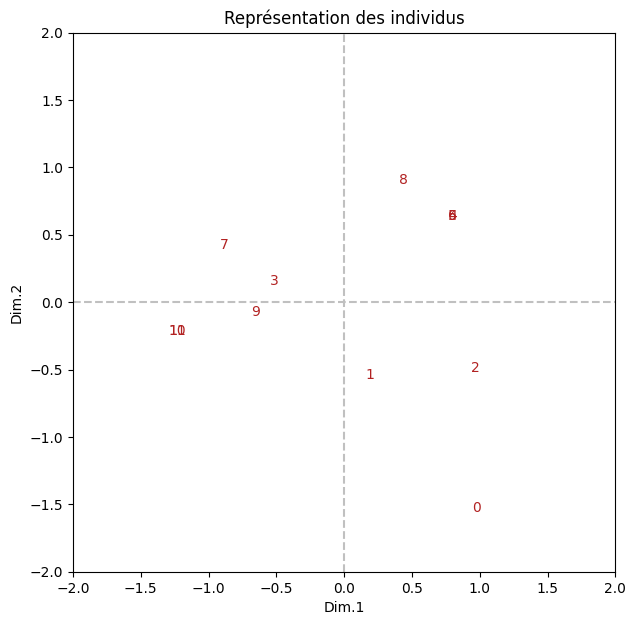

In [ ]:
#représentation des individus dans le plan
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation des individus")

for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')

plt.show()

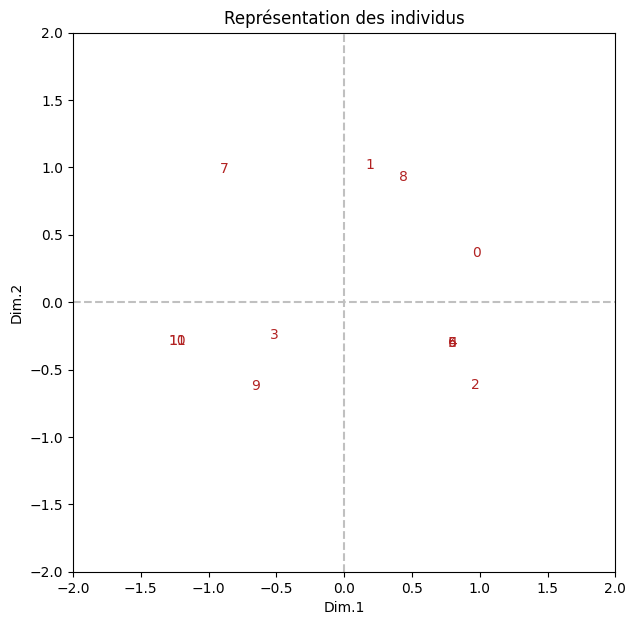

In [ ]:
#représentation des individus dans le plan
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation des individus")

for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,2],X.index[i],color='firebrick')

plt.show()

# la contribution

In [ ]:
#afficher les contributions
print(pandas.DataFrame(acm.row_contrib_[:,:3],index=X.index,columns=['Contrib.F1','Contrib.F2','Contrib.F3']))

    Contrib.F1  Contrib.F2  Contrib.F3
0    10.195800   46.432809    2.671733
1     0.284964    6.256511   22.831515
2    10.086967    5.095098    9.693570
3     3.450354    0.321075    1.735676
4     6.782791    7.150499    2.580466
5     6.782791    7.150499    2.580466
6     6.782791    7.150499    2.580466
7     9.587087    3.051028   21.691125
8     1.864835   14.854288   19.083276
9     5.370845    0.211625    9.947270
10   19.405388    1.163034    2.302219
11   19.405388    1.163034    2.302219


# COS2

In [ ]:
#affichage des COS2
print(pandas.DataFrame(acm.row_cos2_[:,:3],index=X.index,columns=['Cos2.F1','Cos2.F2','Cos2.F3']))

     Cos2.F1   Cos2.F2   Cos2.F3
0   0.248122  0.676065  0.031867
1   0.009526  0.125131  0.374070
2   0.369689  0.111724  0.174126
3   0.214201  0.011926  0.052812
4   0.503244  0.317414  0.093837
5   0.503244  0.317414  0.093837
6   0.503244  0.317414  0.093837
7   0.320479  0.061021  0.355386
8   0.068347  0.325722  0.342795
9   0.273820  0.006455  0.248560
10  0.872372  0.031282  0.050726
11  0.872372  0.031282  0.050726


In [ ]:
#affichage des COS2 cumulés
print(pandas.DataFrame(numpy.cumsum(acm.row_cos2_[:,:3],axis=1),index=X.index,columns=['Cos2.F1','Cos2.F2','Cum(Cos2).F3']))

     Cos2.F1   Cos2.F2  Cum(Cos2).F3
0   0.248122  0.924187      0.956054
1   0.009526  0.134657      0.508726
2   0.369689  0.481413      0.655540
3   0.214201  0.226127      0.278939
4   0.503244  0.820658      0.914495
5   0.503244  0.820658      0.914495
6   0.503244  0.820658      0.914495
7   0.320479  0.381500      0.736885
8   0.068347  0.394069      0.736863
9   0.273820  0.280275      0.528835
10  0.872372  0.903654      0.954380
11  0.872372  0.903654      0.954380
